# Dichotomous 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f(x):
    if(0 <= x <=2):
        return 4*x
    if(2<=x<=4):
        return 4-x
    else:
        return 0

def dichotomous(a,b,err,iter,dell):
    xl = a
    xr = b 
    x1 = 0
    x2 = 0
    for i in range(iter):
        avg = (xr+xl)/2
        x1 = avg - (dell/2)
        x2 = avg + (dell/2)
        if f(x1) > f(x2):
            xr = x2
        if f(x1) < f(x2):
            xl = x1
        else:
            xl = x1
            xr = x2
        
        if abs(x1-x2) < err:
            break
    return xl
k = dichotomous(0,4,0.01,100,0.01)
z = f(k)        
print('maxima for the functions is at = ',k)

maxima for the functions is at =  1.995


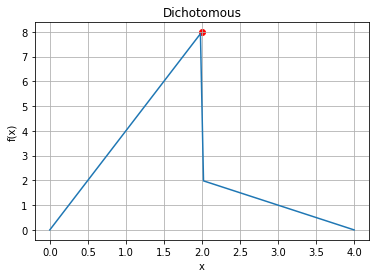

In [3]:
x = np.linspace(0,4,100)
y = []
for i in x:
    y.append(f(i))
plt.plot(x,y)
plt.scatter(k,z,color = 'red')
plt.grid('true')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Dichotomous')

plt.show()

#  Gradient descent

In [4]:
def f(x):
    return x**2
def g(x):
    return 2*x
def grad_desc(lr,x0,e,niter):
    x=x0
    temp=0
    cond=True
    for i in range(niter):
        x1=x-lr*g(x0)
        #print(x1,x)
        temp=x
        x=x1
        cond=(temp - x1) <= e or x1 < lr
        #print(cond)
        if cond==False:
            continue
        else:
            break
        
    return x

m = (grad_desc(0.01,10,0.001,550))
z = f(m)
print('minima for the functions is at  = ',m)

minima for the functions is at  =  2.0539125955565396e-15


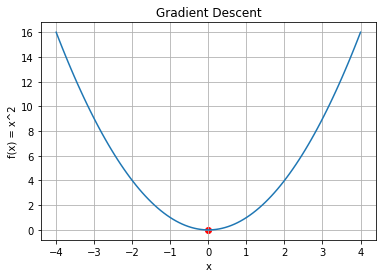

In [5]:
x = np.linspace(-4,4,100)
y = []
for i in x:
    y.append(f(i))
    
plt.plot(x,y)
plt.scatter(m,z,color = 'red')
plt.grid('true')
plt.xlabel('x')
plt.ylabel('f(x) = x^2')
plt.title('Gradient Descent')
plt.show()

# Golden section


In [6]:
def f(x):
    if 0<=x<=2:
        return 3*x
    elif 2<=x<=3:
        return (1/3)*(20-x)
    else:
        return 0
def gs(a,b,niter,err):
    if type(a)!=int or type(b)!=int:
        print('a,b is not an interval')
        return
    i=[a,b]
    xl=a
    xr=b
    g=0.618
    x1=0
    x2=0
    for j in range(niter):
        x1=xr-g*(xr-xl)
        x2=xl+g*(xr-xl)
        e = f(x1)
        e2=f(x2)
        if e<e2:
            xl=x1
            xr=xr
        elif e>e2:
            xl=xl
            xr=x2
        else:
            x1=xr-g*(xr-xl)
            x2=xl+g*(xr-xl)
            xl=x1
            xr=x2
        if abs(f(x1)-f(x2))<err:
            break
        #print(xl,xr)
    return x1
    
l = gs(0,3,100,1e-10)
z = f(l)
print('maxima for the function is at = ',l)


maxima for the function is at =  2.0000000000522054


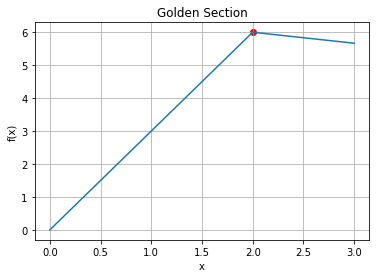

In [7]:
x = np.linspace(0,3,1000)
y = []
for i in x:
    y.append(f(i))
    
plt.plot(x,y)
plt.scatter(l,z,color = 'red')
plt.grid('true')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Golden Section')
plt.show()

# Extremum using Newton-Raphson

In [8]:
import numpy as np
from scipy import linalg, sparse
def f(x1,x2):
    return x1**3+x2**3-3*x1*x2
def g(x1,x2):
    return np.array([[3*x1**2-3*x2],[3*x2**2-3*x1]])
def gj(x1,x2):
    return np.array([[6*x1,-3],[-3,6*x2]])
def newton_raphson(xk,e,n):
    xk1 = np.array([[0],[0]])
    x1 = xk.item(0)
    x2 = xk.item(1)
    flag = 0
    for i in range(n):
        a = gj(x1,x2)
        xk1 = np.subtract(xk,(np.dot(linalg.inv(a),g(x1,x2))))
        x1 = xk1.item(0)
        x2 = xk1.item(1)
        m = np.linalg.norm(xk)
        n = np.linalg.norm(xk1)
        #print(m,n,abs(m-n))
        if abs(m-n) < e:
            flag = 1
            break
        xk = xk1
        #print(i,xk)


    if(flag == 0):
        print("not convergible!!!")
        return
    return xk1
a = np.array([[1],[2]])
b = newton_raphson(a,0.001,500)
c = b.item(0)
d = b.item(1)

e = f(c,d)
h = g(c,d)
if e < 0:
    print(f"for critical points x1 ={c} x2 = {d}  \n the function value of g({c},{d}) is = \n {h},")
    print(f" f = f({c},{d}) = {e} ,(<0)therefore MAXIMA" )
if e > 0:
    print(f"for critical points x1 ={c} x2 = {d} the function value of g({c},{d}) is = \n {h},")
    print(f" f =f({c},{d}) = {e} ,(>0)therefore MINIMA" )
if e == 0:
    print(f"not determinable" )

for critical points x1 =1.000000000001982 x2 = 1.0000000000022335  
 the function value of g(1.000000000001982,1.0000000000022335) is = 
 [[5.19140286e-12]
 [7.45536965e-12]],
 f = f(1.000000000001982,1.0000000000022335) = -1.0 ,(<0)therefore MAXIMA


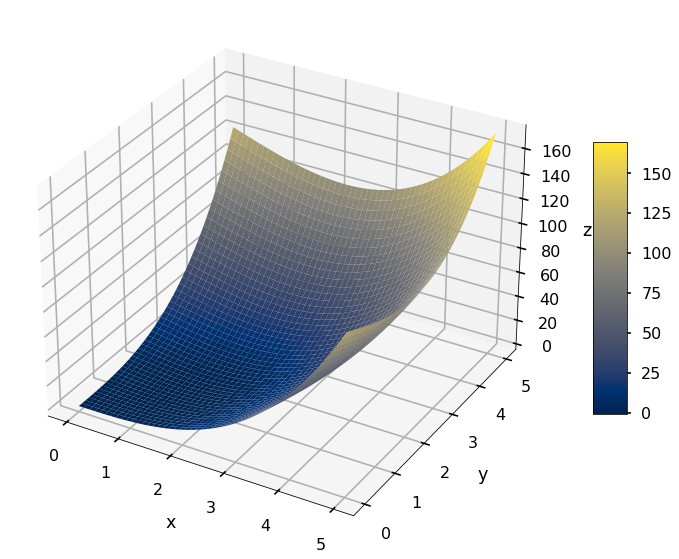

In [9]:
from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')
fig= plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.grid()
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

surf = ax.plot_surface(X,Y,Z, cmap= plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)
#for i in range(150):
  #  ax.scatter(c,0,i,marker='o', c = 'black', )
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y',labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()
